El segundo acercamiento se realiza con el archivo "230303_formaciones.csv", que tiene 419472 instancias por 30 características como NIS	GENERO	FECHA_NACIMIENTO	ESTADO_CIVIL	ESTRATO	PUNTAJE_ICFES	SISBEN	DBU_HIJOS	COD_PAIS_RESISENCIA	COD_DPTO_RESIDENCIA	COD_MUNICIPIO_RESIDENCIA	COD_ZONA_RESIDENCIA	COD_BARRIO_RESIDENCIA	RGA_ID	RGA_PERIODO	NIS	TIPO_DOCUMENTO	NUM_DOC_IDENTIDAD	ING_ID	FIC_ID	PRF_ID	RTA_ID	RGA_ETAPA_RUTA	RGA_ESTADO	RGA_FCH_REGISTRO	RGA_FCH_ULTIMO_ESTADO	NIS_EMP	RGA_FCH_PASO_A_PRO	RGA_FCH_FIN_FORMACION	RGA_APROBAR_GEN_CERTIFICADO

02/03/2023 La Directora del proyecto SENA, decide realizar el análisis sobre los aprendices matriculados en la primera oferta Titulada Presencial 2018.

10/03/2023 Se recibe el archivo "230310_formaciones_oferta_724.csv"

-Identificación de archivo a procesar

-Cargue del archivo en Github

-Cargue del archivo desde Github

-Exploración de las caracteríticas del archivo

-Identificación de características

-Identificación de características categóricas y las características numéricas

-Exploración de valores en las características:

  *Faltantes

  *Únicos
-Identificación de posibles caracteríticas a desechar

-Identificación de estrategia para valores faltantes en las caracteríticas

Cargue del archivo desde github

In [1]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
from io import BytesIO
from pathlib import Path
import urllib.request
import warnings
warnings.filterwarnings('ignore')
#https://drive.google.com/file/d/1flzdpualWKZrAtri3LvlOuAL0dgeFttj/view?usp=share_link

Cargue del conjunto de datos 230303_formaciones.csv en Pandas.

In [2]:
#para leerlo desde github
#df = pd.read_csv('https://raw.githubusercontent.com/armaacum/data/main/230303_formaciones.csv',encoding='latin1', sep = ';')   # No se puede guardar ese archivo como .csv el github porque es muy grande
df = pd.read_csv('/content/230303_formaciones.csv', encoding='latin1', sep = ';')

In [3]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#Armando

Se exploran las caracteríticas del archivo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419472 entries, 0 to 419471
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NIS                          419472 non-null  int64  
 1   GENERO                       419472 non-null  object 
 2   FECHA_NACIMIENTO             419472 non-null  object 
 3   ESTADO_CIVIL                 419472 non-null  object 
 4   ESTRATO                      419472 non-null  int64  
 5   PUNTAJE_ICFES                19014 non-null   object 
 6   SISBEN                       0 non-null       float64
 7   DBU_HIJOS                    0 non-null       float64
 8   COD_PAIS_RESISENCIA          419472 non-null  int64  
 9   COD_DPTO_RESIDENCIA          419472 non-null  int64  
 10  COD_MUNICIPIO_RESIDENCIA     419472 non-null  int64  
 11  COD_ZONA_RESIDENCIA          29576 non-null   float64
 12  COD_BARRIO_RESIDENCIA        26010 non-null   float64
 13 

In [5]:
df.shape

(419472, 29)

El archivo contiene 419472 intancias por 29 características

Se identifican los nombre de todas las características

In [6]:
columns = df.columns.values
columns

array(['NIS', 'GENERO', 'FECHA_NACIMIENTO', 'ESTADO_CIVIL', 'ESTRATO',
       'PUNTAJE_ICFES', 'SISBEN', 'DBU_HIJOS', 'COD_PAIS_RESISENCIA',
       'COD_DPTO_RESIDENCIA', 'COD_MUNICIPIO_RESIDENCIA',
       'COD_ZONA_RESIDENCIA', 'COD_BARRIO_RESIDENCIA', 'RGA_ID',
       'RGA_PERIODO', 'NIS.1', 'TIPO_DOCUMENTO', 'ING_ID', 'FIC_ID',
       'PRF_ID', 'RTA_ID', 'RGA_ETAPA_RUTA', 'RGA_ESTADO',
       'RGA_FCH_REGISTRO', 'RGA_FCH_ULTIMO_ESTADO', 'NIS_EMP',
       'RGA_FCH_PASO_A_PRO', 'RGA_FCH_FIN_FORMACION',
       'RGA_APROBAR_GEN_CERTIFICADO'], dtype=object)

Se identifican las características categóricas y las características numéricas

In [7]:
for t in columns:
  print(t, df[t].dtype)

NIS int64
GENERO object
FECHA_NACIMIENTO object
ESTADO_CIVIL object
ESTRATO int64
PUNTAJE_ICFES object
SISBEN float64
DBU_HIJOS float64
COD_PAIS_RESISENCIA int64
COD_DPTO_RESIDENCIA int64
COD_MUNICIPIO_RESIDENCIA int64
COD_ZONA_RESIDENCIA float64
COD_BARRIO_RESIDENCIA float64
RGA_ID int64
RGA_PERIODO int64
NIS.1 int64
TIPO_DOCUMENTO object
ING_ID int64
FIC_ID int64
PRF_ID int64
RTA_ID float64
RGA_ETAPA_RUTA object
RGA_ESTADO int64
RGA_FCH_REGISTRO object
RGA_FCH_ULTIMO_ESTADO object
NIS_EMP float64
RGA_FCH_PASO_A_PRO object
RGA_FCH_FIN_FORMACION object
RGA_APROBAR_GEN_CERTIFICADO float64


In [8]:
categoricos_col =[]
for t in columns:
  if df[t].dtype == 'object':
    categoricos_col.append(t)
categoricos_col


['GENERO',
 'FECHA_NACIMIENTO',
 'ESTADO_CIVIL',
 'PUNTAJE_ICFES',
 'TIPO_DOCUMENTO',
 'RGA_ETAPA_RUTA',
 'RGA_FCH_REGISTRO',
 'RGA_FCH_ULTIMO_ESTADO',
 'RGA_FCH_PASO_A_PRO',
 'RGA_FCH_FIN_FORMACION']

In [9]:
numericas_col=[]
for t in columns:
  if df[t].dtype == 'int64':
    numericas_col.append(t)
numericas_col

['NIS',
 'ESTRATO',
 'COD_PAIS_RESISENCIA',
 'COD_DPTO_RESIDENCIA',
 'COD_MUNICIPIO_RESIDENCIA',
 'RGA_ID',
 'RGA_PERIODO',
 'NIS.1',
 'ING_ID',
 'FIC_ID',
 'PRF_ID',
 'RGA_ESTADO']

In [10]:
data=[]
for d in columns:
  w=df[d].unique()
  print("Cantidad de valores únicos en ",d, " = ",len(w))


Cantidad de valores únicos en  NIS  =  88846
Cantidad de valores únicos en  GENERO  =  2
Cantidad de valores únicos en  FECHA_NACIMIENTO  =  20095
Cantidad de valores únicos en  ESTADO_CIVIL  =  7
Cantidad de valores únicos en  ESTRATO  =  6
Cantidad de valores únicos en  PUNTAJE_ICFES  =  668
Cantidad de valores únicos en  SISBEN  =  1
Cantidad de valores únicos en  DBU_HIJOS  =  1
Cantidad de valores únicos en  COD_PAIS_RESISENCIA  =  30
Cantidad de valores únicos en  COD_DPTO_RESIDENCIA  =  145
Cantidad de valores únicos en  COD_MUNICIPIO_RESIDENCIA  =  1228
Cantidad de valores únicos en  COD_ZONA_RESIDENCIA  =  348
Cantidad de valores únicos en  COD_BARRIO_RESIDENCIA  =  1625
Cantidad de valores únicos en  RGA_ID  =  419472
Cantidad de valores únicos en  RGA_PERIODO  =  159
Cantidad de valores únicos en  NIS.1  =  88846
Cantidad de valores únicos en  TIPO_DOCUMENTO  =  11
Cantidad de valores únicos en  ING_ID  =  419472
Cantidad de valores únicos en  FIC_ID  =  332398
Cantidad de v

De acuerdo a los resultados anteriores se concluye que la caracterítica MODALIDAD tiene el mismo valor para todas las intancias, al no variar, no se tendrá en cuenta en el análisis.

In [11]:
df.isnull().sum()

NIS                                 0
GENERO                              0
FECHA_NACIMIENTO                    0
ESTADO_CIVIL                        0
ESTRATO                             0
PUNTAJE_ICFES                  400458
SISBEN                         419472
DBU_HIJOS                      419472
COD_PAIS_RESISENCIA                 0
COD_DPTO_RESIDENCIA                 0
COD_MUNICIPIO_RESIDENCIA            0
COD_ZONA_RESIDENCIA            389896
COD_BARRIO_RESIDENCIA          393462
RGA_ID                              0
RGA_PERIODO                         0
NIS.1                               0
TIPO_DOCUMENTO                      0
ING_ID                              0
FIC_ID                              0
PRF_ID                              0
RTA_ID                           1826
RGA_ETAPA_RUTA                   1824
RGA_ESTADO                          0
RGA_FCH_REGISTRO                    0
RGA_FCH_ULTIMO_ESTADO               0
NIS_EMP                        419466
RGA_FCH_PASO

In [12]:
def check(data):
    l=[]
    columns=data.columns
    for col in columns:
        dtypes=data[col].dtypes
        nunique=data[col].nunique()
        sum_null=data[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    res=pd.DataFrame(l)
    res.columns=['column','dtypes','nunique','sum_null']
    return res
check(df)

,column,dtypes,nunique,sum_null
0,NIS,int64,88846,0
1,GENERO,object,2,0
2,FECHA_NACIMIENTO,object,20095,0
3,ESTADO_CIVIL,object,7,0
4,ESTRATO,int64,6,0
5,PUNTAJE_ICFES,object,667,400458
6,SISBEN,float64,0,419472
7,DBU_HIJOS,float64,0,419472
8,COD_PAIS_RESISENCIA,int64,30,0
9,COD_DPTO_RESIDENCIA,int64,145,0


In [13]:
df["GENERO"].value_counts()

GENERO
F    237684
M    181788
Name: count, dtype: int64

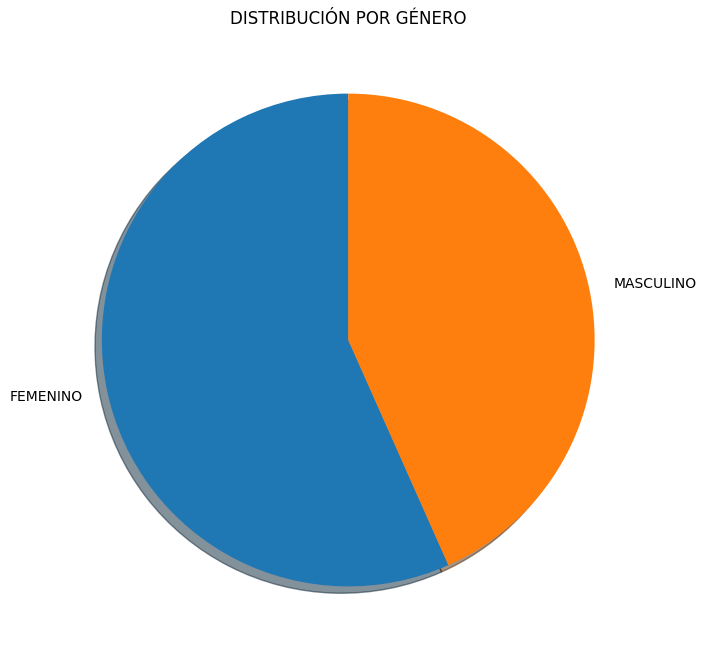

In [14]:
plt.figure(figsize=(12, 8))
plt.title('DISTRIBUCIÓN POR GÉNERO')
ay = df["GENERO"].value_counts()
mylabels = ["FEMENINO", "MASCULINO"]
plt.pie(ay, labels = mylabels, startangle = 90, shadow = True)
plt.show()

In [15]:
print("FEMENINO  {:.2f} %".format(df.apply(lambda x: x['GENERO'] == 'F', axis=1).sum() / len(df) *100))
print("MASCULINO {:.2f} %".format(df.apply(lambda x: x['GENERO'] == 'M', axis=1).sum() / len(df) *100))

FEMENINO  56.66 %
MASCULINO 43.34 %


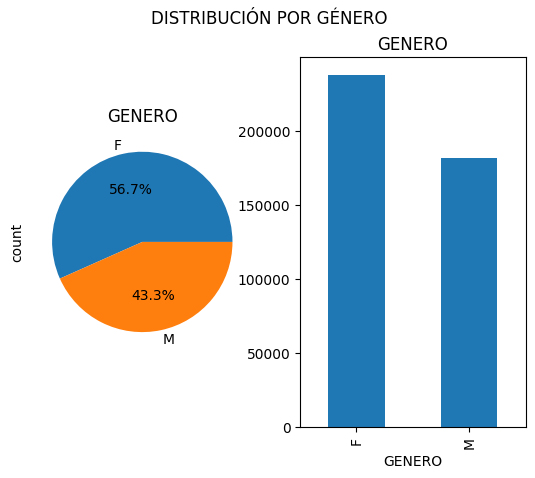

In [16]:
# INTENTO PARA GENERAR GRAFICA CON PORCENTAJES PARA GENERO
genero = df["GENERO"].value_counts()
plt.subplot(1,2,1)
genero.plot(kind="pie", autopct='%1.01f%%')
plt.title("GENERO")
#plt.suptitle("suptitle")

plt.subplot(1,2,2)
genero.plot(kind="bar")
plt.title("GENERO")
plt.suptitle("DISTRIBUCIÓN POR GÉNERO")
plt.show()

In [17]:
#Estado civil del usuario. Valores de chequeo: V - Viudo; E - Separado ; U - Unión Libre ; C - Casado; S - Soltero; I - Indiferente ,  N No Ingresado
df["ESTADO_CIVIL"].value_counts()

ESTADO_CIVIL
S    161940
N    131775
U     51095
C     51071
I     15616
E      6723
V      1252
Name: count, dtype: int64

In [18]:
df["ESTADO_CIVIL"].unique()

array(['N', 'E', 'S', 'C', 'I', 'U', 'V'], dtype=object)

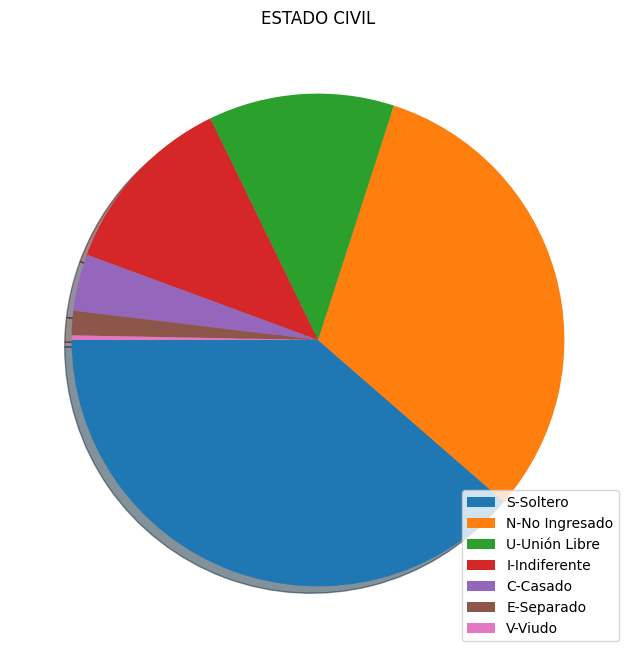

In [19]:
plt.figure(figsize=(12, 8))
plt.title('ESTADO CIVIL')
ay = df["ESTADO_CIVIL"].value_counts()
#mylabels = df["ESTADO_CIVIL"].unique() #["V-Viudo", "E-Separado", "U-Unión Libre", "C-Casado", "S-Soltero", "I-Indiferente", "N-No Ingresado"]
mylabels = ["S-Soltero","N-No Ingresado", "U-Unión Libre","I-Indiferente" ,"C-Casado","E-Separado","V-Viudo"]
plt.pie(df["ESTADO_CIVIL"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

In [20]:
print("SOLTERO  {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'S', axis=1).sum() / len(df) *100))
print("UNION LIBRE {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'U', axis=1).sum() / len(df) *100))
print("CASADO {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'C', axis=1).sum() / len(df) *100))
print("VIUDO {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'V', axis=1).sum() / len(df) *100))
print("SEPARADO {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'E', axis=1).sum() / len(df) *100))
print("INDIFERENTE {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'I', axis=1).sum() / len(df) *100))
print("NO INGRESADO {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'N', axis=1).sum() / len(df) *100))


SOLTERO  38.61 %
UNION LIBRE 12.18 %
CASADO 12.18 %
VIUDO 0.30 %
SEPARADO 1.60 %
INDIFERENTE 3.72 %
NO INGRESADO 31.41 %


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR ESTADO CIVIL'}, xlabel='ESTADO_CIVIL', ylabel='No. DE APRENDICES'>

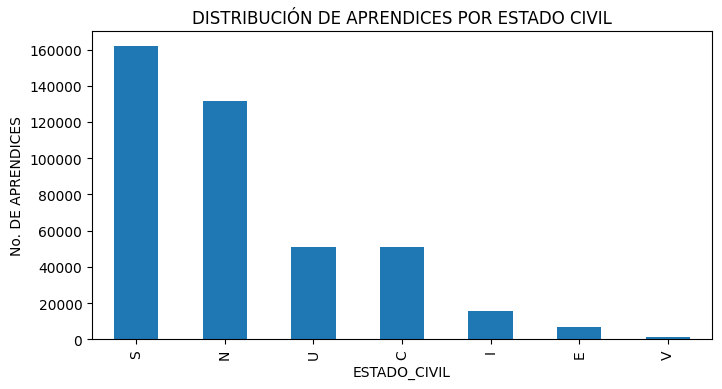

In [21]:
plt.xlabel("ESTADO_CIVIL")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR ESTADO CIVIL")
df["ESTADO_CIVIL"].value_counts().plot(kind='bar', figsize=(8,4))

Análisis ESTRATO

In [22]:
#Estado civil del usuario. Valores de chequeo: V - Viudo; E - Separado ; U - Unión Libre ; C - Casado; S - Soltero; I - Indiferente ,  N No Ingresado
df["ESTRATO"].value_counts()

ESTRATO
1    183480
2    158802
3     67153
4      7865
5      1650
6       522
Name: count, dtype: int64

In [23]:
df["ESTRATO"].unique()

array([2, 1, 3, 4, 5, 6])

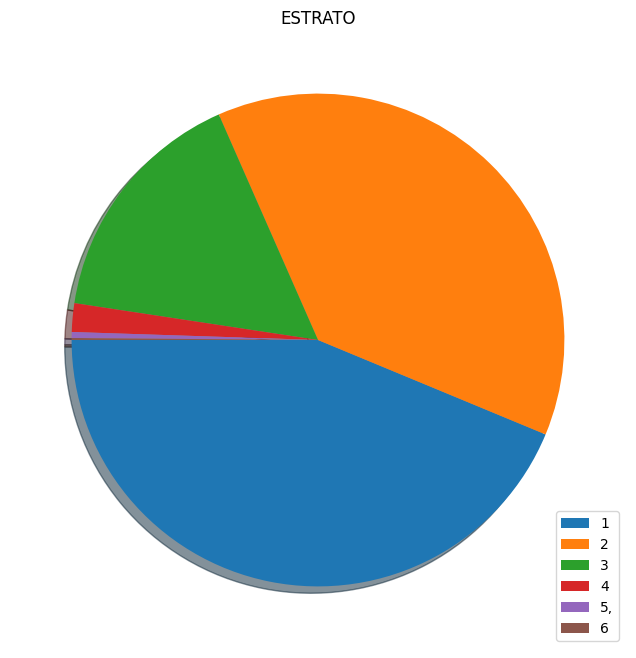

In [24]:
plt.figure(figsize=(12, 8))
plt.title('ESTRATO')
ay = df["ESTRATO"].value_counts()
mylabels = ['1', '2', '3', '4', '5,', '6']
plt.pie(df["ESTRATO"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR ESTRATO'}, xlabel='ESTRATO', ylabel='No. DE APRENDICES'>

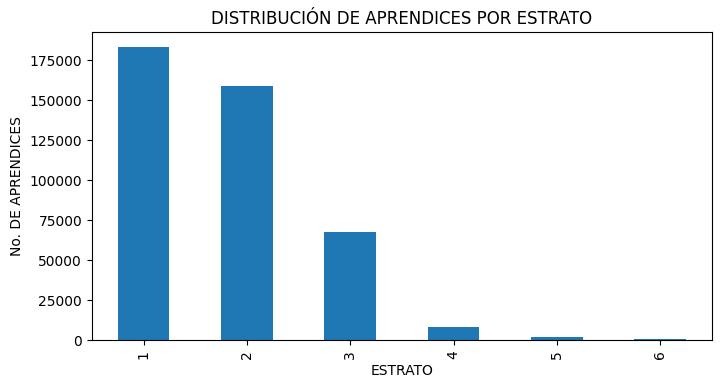

In [25]:
plt.xlabel("ESTRATO")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR ESTRATO")
df["ESTRATO"].value_counts().plot(kind='bar', figsize=(8,4))

In [26]:
print("ESTRATO 1 {:.2f} %".format(df.apply(lambda x: x['ESTRATO'] == 1, axis=1).sum() / len(df) *100))
print("ESTRATO 2 {:.2f} %".format(df.apply(lambda x: x['ESTRATO'] == 2, axis=1).sum() / len(df) *100))
print("ESTRATO 3 {:.2f} %".format(df.apply(lambda x: x['ESTRATO'] == 3, axis=1).sum() / len(df) *100))
print("ESTRATO 4 {:.2f} %".format(df.apply(lambda x: x['ESTRATO'] == 4, axis=1).sum() / len(df) *100))
print("ESTRATO 5 {:.2f} %".format(df.apply(lambda x: x['ESTRATO'] == 5, axis=1).sum() / len(df) *100))
print("ESTRATO 6 {:.2f} %".format(df.apply(lambda x: x['ESTRATO'] == 6, axis=1).sum() / len(df) *100))

ESTRATO 1 43.74 %
ESTRATO 2 37.86 %
ESTRATO 3 16.01 %
ESTRATO 4 1.87 %
ESTRATO 5 0.39 %
ESTRATO 6 0.12 %


PUNTAJE ICFES

In [27]:
df["PUNTAJE_ICFES"].value_counts()

PUNTAJE_ICFES
48.0     312
50.0     297
49       274
45.0     273
52.0     265
        ... 
342        1
94,7       1
142        1
264.0      1
510        1
Name: count, Length: 667, dtype: int64

<Axes: >

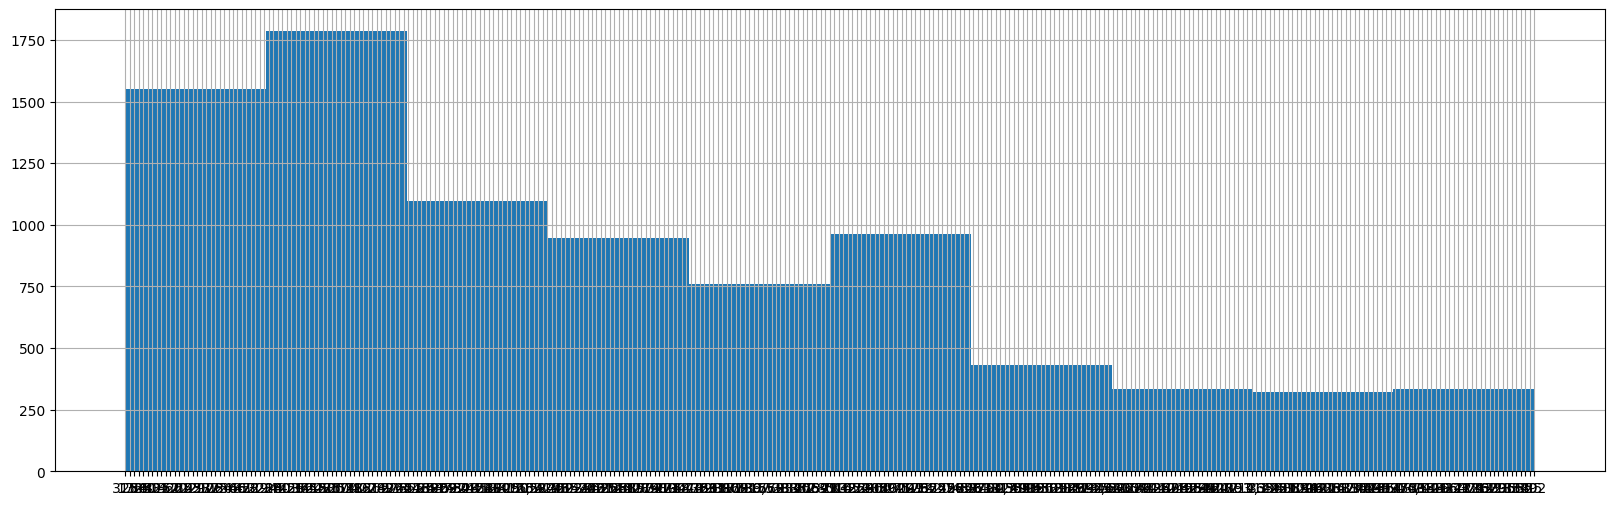

In [28]:
df['PUNTAJE_ICFES'] = df['PUNTAJE_ICFES'].str.replace('.', ',')
plt.figure(figsize=(20, 6))
df["PUNTAJE_ICFES"].hist()

In [29]:
df["PUNTAJE_ICFES"].value_counts()

PUNTAJE_ICFES
49     274
51     244
50     215
45     180
43     179
      ... 
109      1
342      1
173      1
597      1
79       1
Name: count, Length: 315, dtype: int64

NIVEL_SISBEN

In [30]:
df["SISBEN"].value_counts()

Series([], Name: count, dtype: int64)

In [31]:
df["SISBEN"].unique()

array([nan])

In [32]:
print("número de instancias sin valor en SISBEN: ",df["SISBEN"].isna().sum())

número de instancias sin valor en SISBEN:  419472


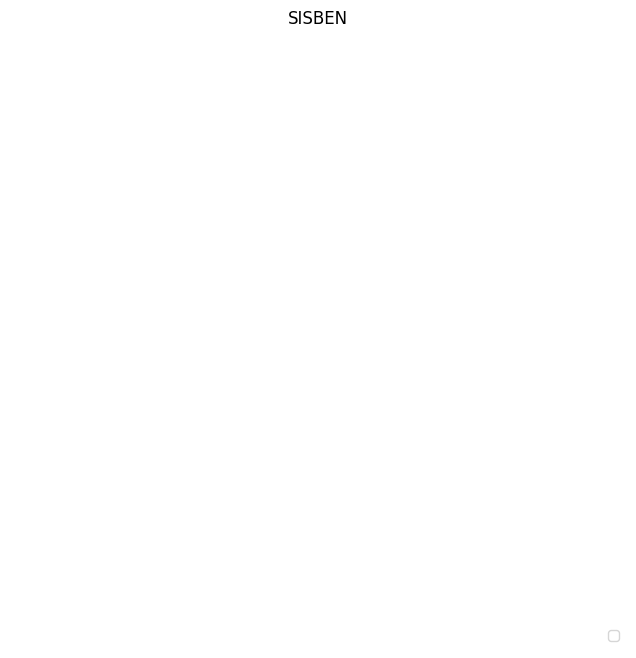

In [33]:
plt.figure(figsize=(12, 8))
plt.title('SISBEN')
ay = df["SISBEN"].value_counts()
mylabels = ['1', '2', '6', '3', '4,', 'nan']
plt.pie(df["SISBEN"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

DBU_HIJOS

In [34]:
df["DBU_HIJOS"].value_counts()

Series([], Name: count, dtype: int64)

In [35]:
df["DBU_HIJOS"].unique()

array([nan])

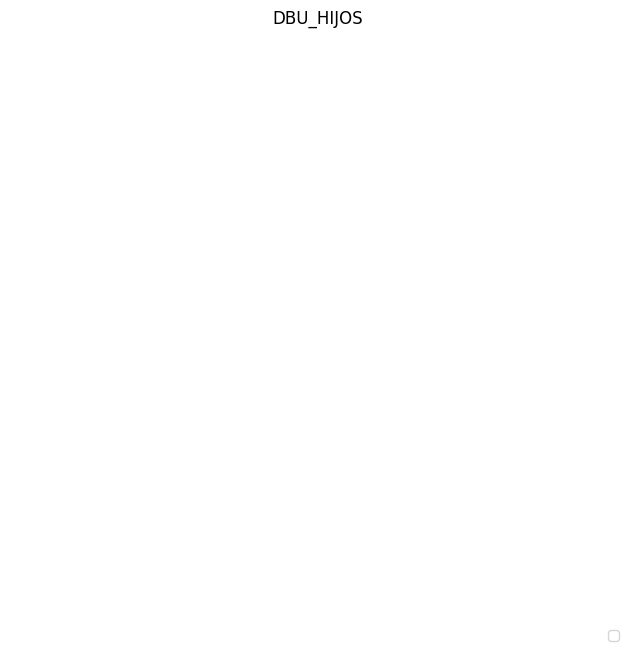

In [36]:
plt.figure(figsize=(12, 8))
plt.title('DBU_HIJOS')
ay = df["DBU_HIJOS"].value_counts()
mylabels = ['0', '1', '2', 'nan']
plt.pie(df["DBU_HIJOS"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

In [37]:
print("número de instancias sin valor en DBU_HIJOS: ",df["DBU_HIJOS"].isna().sum())

número de instancias sin valor en DBU_HIJOS:  419472


COD_PAIS_RESIDENCIA

In [38]:
df["COD_PAIS_RESISENCIA"].value_counts()

COD_PAIS_RESISENCIA
57     418418
58        172
54        159
34        131
56        103
147        82
1          72
593        67
51         63
52         37
506        35
185        29
507        22
189        11
591        10
39          8
505         8
504         8
49          5
595         5
61          5
297         4
46          4
81          4
180         2
178         2
188         2
123         2
43          1
503         1
Name: count, dtype: int64

In [39]:
print("Número de valores únicos: ",len(df["COD_PAIS_RESISENCIA"].unique()))

Número de valores únicos:  30


In [40]:
df["COD_PAIS_RESISENCIA"].unique()

array([ 57,  58, 591, 593,  54,  52,  51, 506,  56,   1, 123,  34, 185,
       505, 147,  61, 180, 189, 507, 504, 595, 297,  49, 178,  46, 188,
        43,  39, 503,  81])

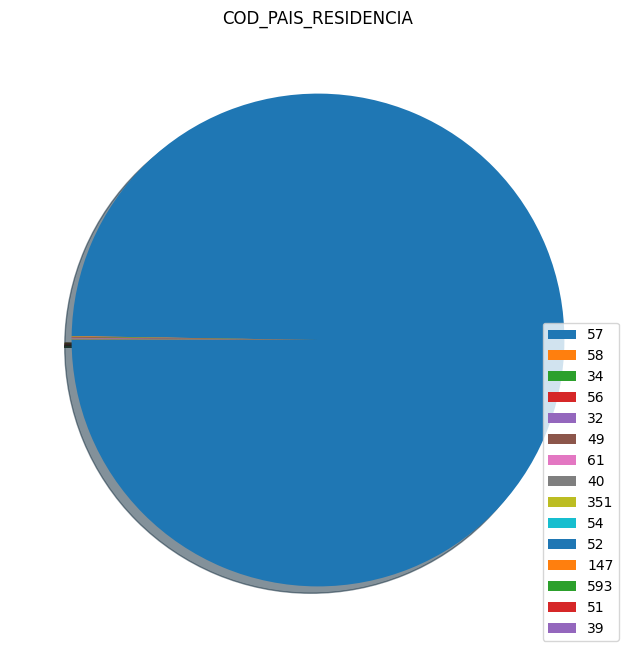

In [41]:
plt.figure(figsize=(12, 8))
plt.title('COD_PAIS_RESIDENCIA')
ay = df["COD_PAIS_RESISENCIA"].value_counts()
mylabels = [57,  58,  34,  56,  32, 49, 61,  40, 351,  54,  52, 147, 593,
        51,  39]
plt.pie(df["COD_PAIS_RESISENCIA"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR PAIS DE RESIDENCIA'}, xlabel='COD_PAIS_RESISENCIA', ylabel='No. DE APRENDICES'>

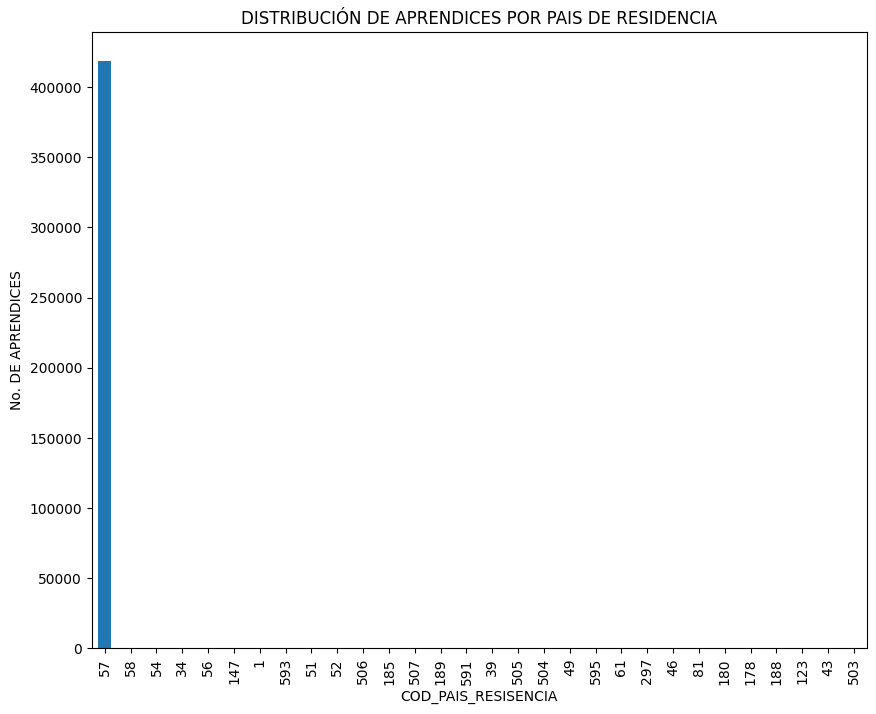

In [42]:
plt.xlabel("PAIS DE RESIDENCIA")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR PAIS DE RESIDENCIA")
df["COD_PAIS_RESISENCIA"].value_counts().plot(kind='bar',  figsize=(10,8))

COD_DPTO_RESIDENCIA

In [43]:
df["COD_DPTO_RESIDENCIA"].value_counts()

COD_DPTO_RESIDENCIA
57011     69570
57005     45552
57025     30756
57068     27810
57076     27792
          ...  
147032        1
52020         1
43008         1
51010         1
52021         1
Name: count, Length: 145, dtype: int64

In [44]:
df["COD_DPTO_RESIDENCIA"].unique()

array([ 57050,  57013,  57054,  57005,  57025,  57015,  57008,  57017,
        57027,  57076,  57070,  57068,  57011,  57041,  57099,  57047,
        57052,  57073,  57088,  57095,  57018,  57066,  57063,  57023,
        57044,  57085,  57020,  57019,  57086,  57081,  58011, 591002,
        57094, 593020,  54010,  57091, 593001,  52021,  51003,  58022,
        57097,  58015, 506007,  56007,   1003,  58007,  52023, 123003,
        56013,  58019,  51013,  52016,   1008,  34009,  58014, 185029,
       505010, 999999, 147013,  51001, 506003,  56012, 147043,  58004,
        34062,  51007,  61006,  34018, 147014,  34051, 185030,  34013,
       593018,  51011, 147018,  58006, 180023,  54008, 189051,  34038,
       507008, 591004, 147016, 147034, 147035, 593008, 185001,  34058,
         1007,  34042,  54009, 185004,  52020,   1001,  51005, 504007,
       593019, 595010, 147003, 297001,  49004,  34060, 178065, 147046,
        56002,  49007,  54018,  58020, 147025, 593007,  46003,  52017,
      

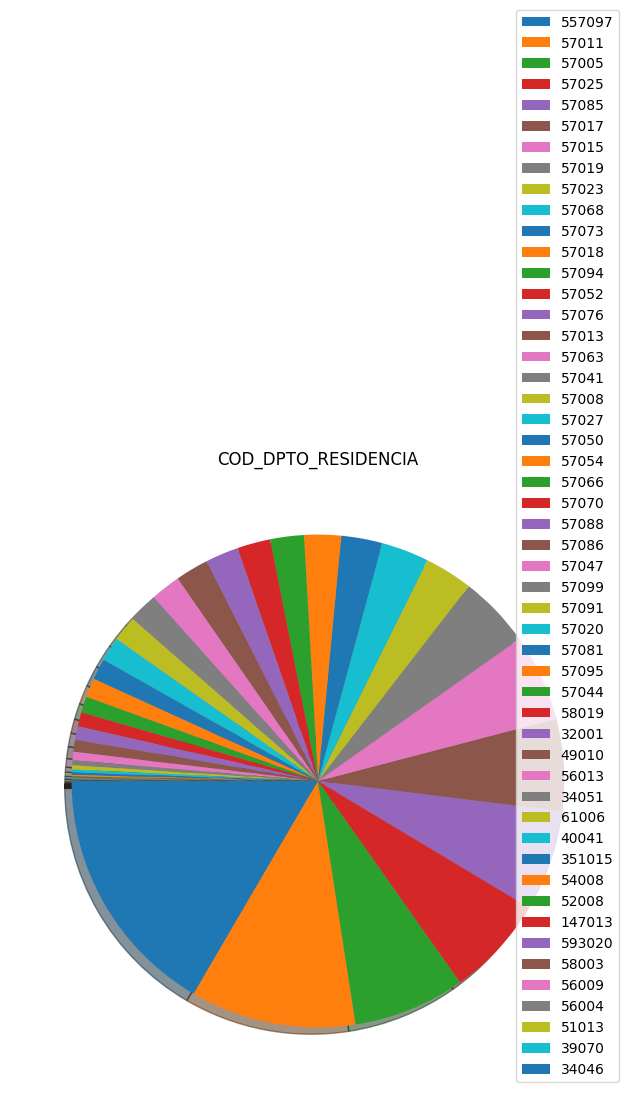

In [45]:
plt.figure(figsize=(12, 8))
plt.title('COD_DPTO_RESIDENCIA')
ay = df["COD_DPTO_RESIDENCIA"].value_counts()
mylabels = [557097,  57011,  57005,  57025,  57085,  57017,  57015,  57019,
        57023,  57068,  57073,  57018,  57094,  57052,  57076,  57013,
        57063,  57041,  57008,  57027,  57050,  57054,  57066,  57070,
        57088,  57086,  57047,  57099,  57091,  57020,  57081,  57095,
        57044,  58019,  32001,  49010,  56013,  34051,  61006,  40041,
       351015,  54008,  52008, 147013, 593020,  58003,  56009,  56004,
        51013,  39070,  34046]
plt.pie(df["COD_DPTO_RESIDENCIA"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

In [46]:
print("Número de valores únicos: ",len(df["COD_DPTO_RESIDENCIA"].unique()))

Número de valores únicos:  145


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR DPTO DE RESIDENCIA'}, xlabel='COD_DPTO_RESIDENCIA', ylabel='No. DE APRENDICES'>

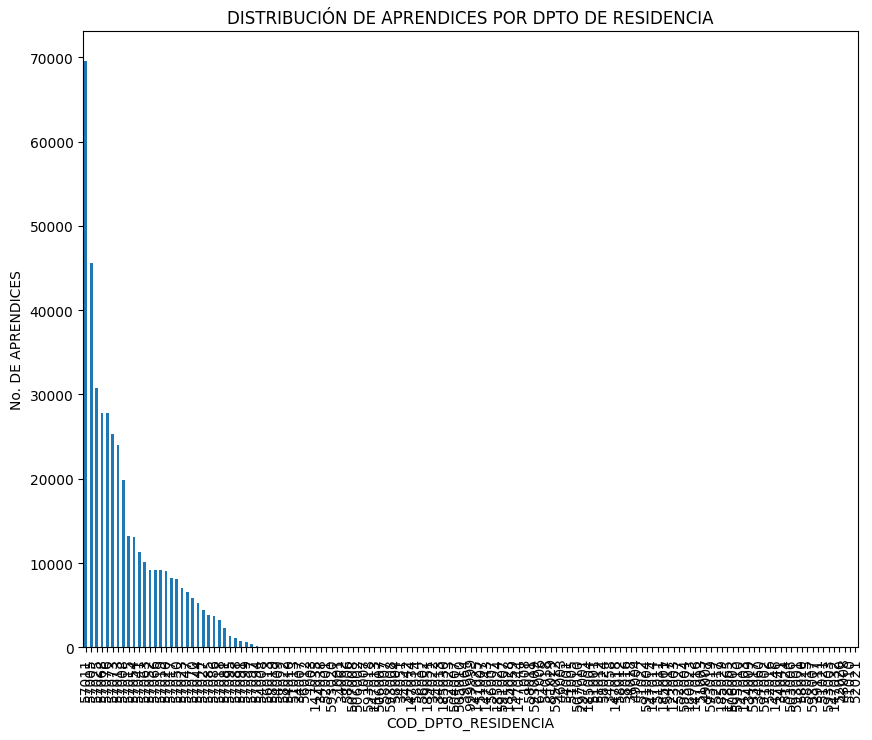

In [47]:
plt.xlabel("DEPARTAMENTO DE RESIDENCIA")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR DPTO DE RESIDENCIA")
df["COD_DPTO_RESIDENCIA"].value_counts().plot(kind='bar',  figsize=(10,8))

Identificación de valores nan en todas las características:

In [48]:
frecuencia = df["COD_DPTO_RESIDENCIA"].value_counts()
total_valores = len(df["COD_DPTO_RESIDENCIA"])
for departamento, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"Departamento: {departamento}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

Departamento: 57011, Frecuencia: 69570, Porcentaje: 16.59%
Departamento: 57005, Frecuencia: 45552, Porcentaje: 10.86%
Departamento: 57025, Frecuencia: 30756, Porcentaje: 7.33%
Departamento: 57068, Frecuencia: 27810, Porcentaje: 6.63%
Departamento: 57076, Frecuencia: 27792, Porcentaje: 6.63%
Departamento: 57073, Frecuencia: 25306, Porcentaje: 6.03%
Departamento: 57013, Frecuencia: 23979, Porcentaje: 5.72%
Departamento: 57008, Frecuencia: 19882, Porcentaje: 4.74%
Departamento: 57015, Frecuencia: 13228, Porcentaje: 3.15%
Departamento: 57054, Frecuencia: 13107, Porcentaje: 3.12%
Departamento: 57041, Frecuencia: 11305, Porcentaje: 2.70%
Departamento: 57063, Frecuencia: 10134, Porcentaje: 2.42%
Departamento: 57052, Frecuencia: 9240, Porcentaje: 2.20%
Departamento: 57066, Frecuencia: 9157, Porcentaje: 2.18%
Departamento: 57019, Frecuencia: 9131, Porcentaje: 2.18%
Departamento: 57020, Frecuencia: 9114, Porcentaje: 2.17%
Departamento: 57017, Frecuencia: 8271, Porcentaje: 1.97%
Departamento: 570

In [49]:
df["COD_MUNICIPIO_RESIDENCIA"].value_counts()

COD_MUNICIPIO_RESIDENCIA
57011001     69564
57005001     16640
57013001     15779
57073001     11964
57076001     10964
             ...  
593007001        1
503006001        1
57085400         1
58019006         1
57015832         1
Name: count, Length: 1228, dtype: int64

In [50]:
print("Número de valores únicos: ",len(df["COD_MUNICIPIO_RESIDENCIA"].unique()))

Número de valores únicos:  1228


In [51]:
frecuencia = df["COD_MUNICIPIO_RESIDENCIA"].value_counts()
total_valores = len(df["COD_MUNICIPIO_RESIDENCIA"])
for municipio, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"Municipio: {municipio}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

Municipio: 57011001, Frecuencia: 69564, Porcentaje: 16.58%
Municipio: 57005001, Frecuencia: 16640, Porcentaje: 3.97%
Municipio: 57013001, Frecuencia: 15779, Porcentaje: 3.76%
Municipio: 57073001, Frecuencia: 11964, Porcentaje: 2.85%
Municipio: 57076001, Frecuencia: 10964, Porcentaje: 2.61%
Municipio: 57008001, Frecuencia: 10482, Porcentaje: 2.50%
Municipio: 57054001, Frecuencia: 7993, Porcentaje: 1.91%
Municipio: 57068001, Frecuencia: 7522, Porcentaje: 1.79%
Municipio: 57063001, Frecuencia: 6336, Porcentaje: 1.51%
Municipio: 57025754, Frecuencia: 5778, Porcentaje: 1.38%
Municipio: 57066001, Frecuencia: 5193, Porcentaje: 1.24%
Municipio: 57050001, Frecuencia: 4912, Porcentaje: 1.17%
Municipio: 57041001, Frecuencia: 4444, Porcentaje: 1.06%
Municipio: 57019001, Frecuencia: 4384, Porcentaje: 1.05%
Municipio: 57047001, Frecuencia: 4156, Porcentaje: 0.99%
Municipio: 57020001, Frecuencia: 3975, Porcentaje: 0.95%
Municipio: 57008758, Frecuencia: 3811, Porcentaje: 0.91%
Municipio: 57017001, Fre

In [52]:
df["COD_ZONA_RESIDENCIA"].value_counts()

COD_ZONA_RESIDENCIA
11.0     1555
8.0      1503
10.0     1371
7.0      1110
465.0     895
         ... 
333.0       1
132.0       1
217.0       1
200.0       1
250.0       1
Name: count, Length: 347, dtype: int64

In [53]:
print("Número de valores únicos: ",len(df["COD_ZONA_RESIDENCIA"].unique()))

Número de valores únicos:  348


In [54]:
valores_nulos = df["COD_ZONA_RESIDENCIA"].isnull().sum()
total_valores = len(df["COD_ZONA_RESIDENCIA"])
porcentaje_nulos = (valores_nulos / total_valores) * 100
print(f"Valores nulos en 'COD_ZONA_RESIDENCIA': {valores_nulos}")
print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

Valores nulos en 'COD_ZONA_RESIDENCIA': 389896
Porcentaje de valores nulos: 92.95%


In [55]:
df["COD_BARRIO_RESIDENCIA"].value_counts()

COD_BARRIO_RESIDENCIA
304.0     309
564.0     160
3094.0    152
372.0     149
2331.0    143
         ... 
971.0       1
130.0       1
8922.0      1
191.0       1
8531.0      1
Name: count, Length: 1624, dtype: int64

In [56]:
print("Número de valores únicos: ",len(df["COD_BARRIO_RESIDENCIA"].unique()))

Número de valores únicos:  1625


In [57]:
valores_nulos = df["COD_BARRIO_RESIDENCIA"].isnull().sum()
total_valores = len(df["COD_BARRIO_RESIDENCIA"])
porcentaje_nulos = (valores_nulos / total_valores) * 100
print(f"Valores nulos en 'COD_BARRIO_RESIDENCIA': {valores_nulos}")
print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

Valores nulos en 'COD_BARRIO_RESIDENCIA': 393462
Porcentaje de valores nulos: 93.80%


In [58]:
print("Número de valores únicos: ",len(df["RGA_ID"].unique()))

Número de valores únicos:  419472


In [59]:
print("Número de valores únicos: ",len(df["RGA_PERIODO"].unique()))

Número de valores únicos:  159


In [60]:
frecuencia = df["RGA_PERIODO"].value_counts()
total_valores = len(df["RGA_PERIODO"])
for RGA_PERIODO, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"RGA_PERIODO: {RGA_PERIODO}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

RGA_PERIODO: 201103, Frecuencia: 13435, Porcentaje: 3.20%
RGA_PERIODO: 201105, Frecuencia: 10917, Porcentaje: 2.60%
RGA_PERIODO: 201001, Frecuencia: 10114, Porcentaje: 2.41%
RGA_PERIODO: 201104, Frecuencia: 9533, Porcentaje: 2.27%
RGA_PERIODO: 201109, Frecuencia: 7081, Porcentaje: 1.69%
RGA_PERIODO: 201304, Frecuencia: 6448, Porcentaje: 1.54%
RGA_PERIODO: 201106, Frecuencia: 6071, Porcentaje: 1.45%
RGA_PERIODO: 201012, Frecuencia: 5490, Porcentaje: 1.31%
RGA_PERIODO: 201008, Frecuencia: 5245, Porcentaje: 1.25%
RGA_PERIODO: 201108, Frecuencia: 4932, Porcentaje: 1.18%
RGA_PERIODO: 201102, Frecuencia: 4884, Porcentaje: 1.16%
RGA_PERIODO: 201303, Frecuencia: 4684, Porcentaje: 1.12%
RGA_PERIODO: 201609, Frecuencia: 4592, Porcentaje: 1.09%
RGA_PERIODO: 201110, Frecuencia: 4235, Porcentaje: 1.01%
RGA_PERIODO: 201005, Frecuencia: 4117, Porcentaje: 0.98%
RGA_PERIODO: 201610, Frecuencia: 4096, Porcentaje: 0.98%
RGA_PERIODO: 201111, Frecuencia: 4041, Porcentaje: 0.96%
RGA_PERIODO: 201307, Frecuen

In [61]:
df["TIPO_DOCUMENTO"].value_counts()

TIPO_DOCUMENTO
CC     380723
TI      37901
CE        347
DNI       256
PEP       151
PS         40
PPT        22
NIS        17
RC          9
NCS         4
RUI         2
Name: count, dtype: int64

In [62]:
print("Número de valores únicos: ",len(df["TIPO_DOCUMENTO"].unique()))

Número de valores únicos:  11


In [63]:
frecuencia = df["TIPO_DOCUMENTO"].value_counts()
total_valores = len(df["TIPO_DOCUMENTO"])
for TIPO_DOCUMENTO, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"TIPO_DOCUMENTO: {TIPO_DOCUMENTO}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

TIPO_DOCUMENTO: CC, Frecuencia: 380723, Porcentaje: 90.76%
TIPO_DOCUMENTO: TI, Frecuencia: 37901, Porcentaje: 9.04%
TIPO_DOCUMENTO: CE, Frecuencia: 347, Porcentaje: 0.08%
TIPO_DOCUMENTO: DNI, Frecuencia: 256, Porcentaje: 0.06%
TIPO_DOCUMENTO: PEP, Frecuencia: 151, Porcentaje: 0.04%
TIPO_DOCUMENTO: PS, Frecuencia: 40, Porcentaje: 0.01%
TIPO_DOCUMENTO: PPT, Frecuencia: 22, Porcentaje: 0.01%
TIPO_DOCUMENTO: NIS, Frecuencia: 17, Porcentaje: 0.00%
TIPO_DOCUMENTO: RC, Frecuencia: 9, Porcentaje: 0.00%
TIPO_DOCUMENTO: NCS, Frecuencia: 4, Porcentaje: 0.00%
TIPO_DOCUMENTO: RUI, Frecuencia: 2, Porcentaje: 0.00%


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR TIPO DE DOCUMENTO'}, xlabel='TIPO_DOCUMENTO', ylabel='No. DE APRENDICES'>

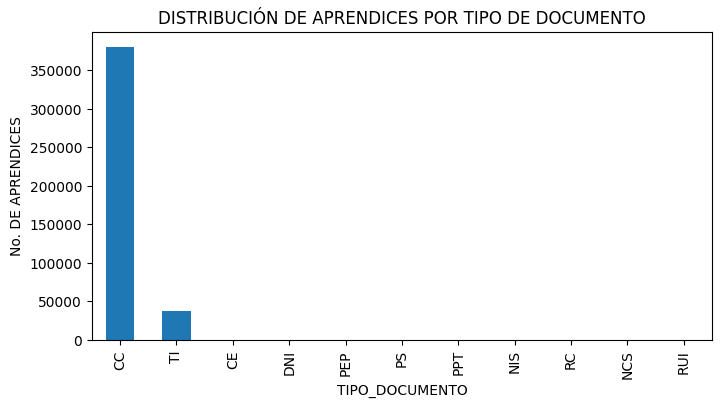

In [64]:
plt.xlabel("TIPO DE DOCUMENTO")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR TIPO DE DOCUMENTO")
df["TIPO_DOCUMENTO"].value_counts().plot(kind='bar', figsize=(8,4))

In [65]:
print("Número de valores únicos: ",len(df["ING_ID"].unique()))

Número de valores únicos:  419472


In [66]:
df["ING_ID"].isnull().sum()

0

In [67]:
df["FIC_ID"].value_counts()

FIC_ID
174841     53
122664     45
373819     34
184545     25
98897      25
           ..
1099153     1
1243819     1
1331894     1
1394834     1
1966092     1
Name: count, Length: 332398, dtype: int64

In [68]:
print("Número de valores únicos: ",len(df["FIC_ID"].unique()))

Número de valores únicos:  332398


In [69]:
df["FIC_ID"].isnull().sum()

0

In [70]:
frecuencia = df["FIC_ID"].value_counts()
total_valores = len(df["FIC_ID"])
for FIC_ID, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"FIC_ID: {FIC_ID}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

Se han truncado las últimas 5000 líneas del flujo de salida.
FIC_ID: 109209, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 948159, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 607631, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1296052, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1534128, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 2556500, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1134934, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1427566, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1636305, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 351123, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1682823, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1768681, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1611113, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1769440, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 228826, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1956236, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 2678616, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 666716, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 67745, Frecuencia: 1, Porcentaje: 0.0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Se han truncado las últimas 5000 líneas del flujo de salida.
FIC_ID: 2602721, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1493239, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1688682, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1737639, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1850768, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1884348, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 2617896, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 330956, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 609139, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 928684, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1746633, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1918509, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 2388016, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1982367, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1564405, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 2439580, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 1646520, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 661927, Frecuencia: 1, Porcentaje: 0.00%
FIC_ID: 776185, Frecuencia: 1, Porcentaje: 

In [71]:
df["PRF_ID"].value_counts()

PRF_ID
74524     8035
73805     7943
84045     4270
66187     4148
63743     3807
          ... 
22913        1
33637        1
66343        1
54253        1
124222       1
Name: count, Length: 20801, dtype: int64

In [72]:
print("Número de valores únicos: ",len(df["PRF_ID"].unique()))

Número de valores únicos:  20801


In [73]:
df["PRF_ID"].isnull().sum()

0

In [74]:
frecuencia = df["PRF_ID"].value_counts()
total_valores = len(df["PRF_ID"])
for PRF_ID, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"PRF_ID: {PRF_ID}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

Se han truncado las últimas 5000 líneas del flujo de salida.
PRF_ID: 53486, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 28246, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 17348, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 22724, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 33973, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 41759, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 41736, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 35739, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 55098, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 16358, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 35303, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 18986, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 14418, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 51763, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 51756, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 51026, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 54828, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 40937, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 34013, Frecuencia: 1, Porcentaje: 0.00%
PRF_ID: 12777, Frecuencia: 

In [75]:
print("Número de valores únicos: ",len(df["RTA_ID"].unique()))

Número de valores únicos:  331155


In [76]:
df["RTA_ID"].isnull().sum()

1826

In [77]:
print("Número de valores únicos: ",len(df["RGA_ETAPA_RUTA"].unique()))

Número de valores únicos:  4


In [78]:
df["RGA_ETAPA_RUTA"].isnull().sum()

1824

In [79]:
frecuencia = df["RGA_ETAPA_RUTA"].value_counts()
total_valores = len(df["RGA_ETAPA_RUTA"])
for RGA_ETAPA_RUTA, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"RGA_ETAPA_RUTA: {RGA_ETAPA_RUTA}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

RGA_ETAPA_RUTA: L, Frecuencia: 401682, Porcentaje: 95.76%
RGA_ETAPA_RUTA: P, Frecuencia: 11590, Porcentaje: 2.76%
RGA_ETAPA_RUTA: M, Frecuencia: 4376, Porcentaje: 1.04%


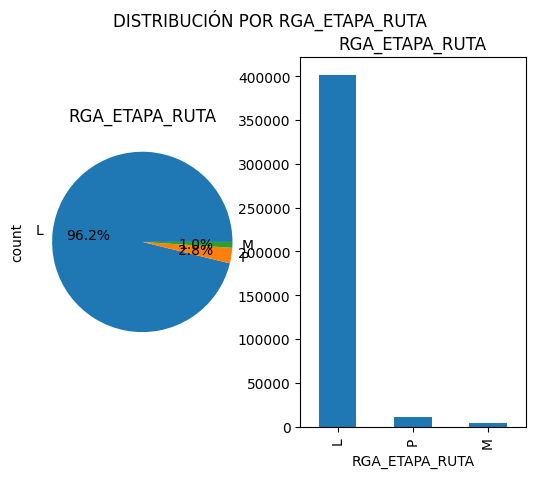

In [80]:
# INTENTO PARA GENERAR GRAFICA CON PORCENTAJES PARA RGA_ETAPA_RUTA
genero = df["RGA_ETAPA_RUTA"].value_counts()
plt.subplot(1,2,1)
genero.plot(kind="pie", autopct='%1.01f%%')
plt.title("RGA_ETAPA_RUTA")
#plt.suptitle("suptitle")

plt.subplot(1,2,2)
genero.plot(kind="bar")
plt.title("RGA_ETAPA_RUTA")
plt.suptitle("DISTRIBUCIÓN POR RGA_ETAPA_RUTA")
plt.show()

In [81]:
print("Número de valores únicos: ",len(df["RGA_ESTADO"].unique()))

Número de valores únicos:  11


In [82]:
df["RGA_ESTADO"].isnull().sum()

0

In [83]:
frecuencia = df["RGA_ESTADO"].value_counts()
total_valores = len(df["RGA_ESTADO"])
for RGA_ESTADO, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"RGA_ESTADO: {RGA_ESTADO}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

RGA_ESTADO: 3, Frecuencia: 251431, Porcentaje: 59.94%
RGA_ESTADO: 2, Frecuencia: 145766, Porcentaje: 34.75%
RGA_ESTADO: 6, Frecuencia: 14425, Porcentaje: 3.44%
RGA_ESTADO: 7, Frecuencia: 4984, Porcentaje: 1.19%
RGA_ESTADO: 11, Frecuencia: 1406, Porcentaje: 0.34%
RGA_ESTADO: 13, Frecuencia: 819, Porcentaje: 0.20%
RGA_ESTADO: 12, Frecuencia: 339, Porcentaje: 0.08%
RGA_ESTADO: 15, Frecuencia: 211, Porcentaje: 0.05%
RGA_ESTADO: 1, Frecuencia: 43, Porcentaje: 0.01%
RGA_ESTADO: 8, Frecuencia: 35, Porcentaje: 0.01%
RGA_ESTADO: 4, Frecuencia: 13, Porcentaje: 0.00%


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR RGA_ESTADO'}, xlabel='RGA_ESTADO', ylabel='No. DE APRENDICES'>

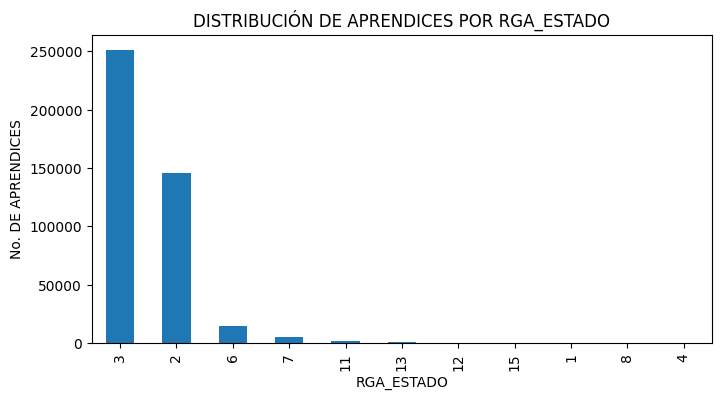

In [84]:
plt.xlabel("RGA_ESTADO")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR RGA_ESTADO")
df["RGA_ESTADO"].value_counts().plot(kind='bar', figsize=(8,4))

In [88]:
print("Número de valores únicos: ",len(df["RGA_FCH_REGISTRO"].unique()))

Número de valores únicos:  324186


In [89]:
df["RGA_FCH_REGISTRO"].isnull().sum()

0

In [94]:
print("Número de valores únicos: ",len(df["RGA_FCH_ULTIMO_ESTADO"].unique()))

Número de valores únicos:  294285


In [98]:
df["RGA_FCH_ULTIMO_ESTADO"].isnull().sum()

0

In [99]:
print("Número de valores únicos: ",len(df["NIS_EMP"].unique()))

Número de valores únicos:  6


In [100]:
df["NIS_EMP"].isnull().sum()

419466

In [101]:
print("Número de valores únicos: ",len(df["RGA_FCH_PASO_A_PRO"].unique()))

Número de valores únicos:  14884


In [102]:
df["RGA_FCH_PASO_A_PRO"].isnull().sum()

403517

In [103]:
print("Número de valores únicos: ",len(df["RGA_FCH_FIN_FORMACION"].unique()))

Número de valores únicos:  222870


In [104]:
df["RGA_FCH_FIN_FORMACION"].isnull().sum()

167639

In [105]:
print("Número de valores únicos: ",len(df["RGA_APROBAR_GEN_CERTIFICADO"].unique()))

Número de valores únicos:  2


In [106]:
df["RGA_APROBAR_GEN_CERTIFICADO"].isnull().sum()

418131

In [107]:
frecuencia = df["RGA_APROBAR_GEN_CERTIFICADO"].value_counts()
total_valores = len(df["RGA_APROBAR_GEN_CERTIFICADO"])
for RGA_APROBAR_GEN_CERTIFICADO, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"RGA_APROBAR_GEN_CERTIFICADO: {RGA_APROBAR_GEN_CERTIFICADO}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

RGA_APROBAR_GEN_CERTIFICADO: 1.0, Frecuencia: 1341, Porcentaje: 0.32%


In [85]:
df.isna().sum()

NIS                                 0
GENERO                              0
FECHA_NACIMIENTO                    0
ESTADO_CIVIL                        0
ESTRATO                             0
PUNTAJE_ICFES                  410959
SISBEN                         419472
DBU_HIJOS                      419472
COD_PAIS_RESISENCIA                 0
COD_DPTO_RESIDENCIA                 0
COD_MUNICIPIO_RESIDENCIA            0
COD_ZONA_RESIDENCIA            389896
COD_BARRIO_RESIDENCIA          393462
RGA_ID                              0
RGA_PERIODO                         0
NIS.1                               0
TIPO_DOCUMENTO                      0
ING_ID                              0
FIC_ID                              0
PRF_ID                              0
RTA_ID                           1826
RGA_ETAPA_RUTA                   1824
RGA_ESTADO                          0
RGA_FCH_REGISTRO                    0
RGA_FCH_ULTIMO_ESTADO               0
NIS_EMP                        419466
RGA_FCH_PASO

In [86]:
df.columns

Index(['NIS', 'GENERO', 'FECHA_NACIMIENTO', 'ESTADO_CIVIL', 'ESTRATO',
       'PUNTAJE_ICFES', 'SISBEN', 'DBU_HIJOS', 'COD_PAIS_RESISENCIA',
       'COD_DPTO_RESIDENCIA', 'COD_MUNICIPIO_RESIDENCIA',
       'COD_ZONA_RESIDENCIA', 'COD_BARRIO_RESIDENCIA', 'RGA_ID', 'RGA_PERIODO',
       'NIS.1', 'TIPO_DOCUMENTO', 'ING_ID', 'FIC_ID', 'PRF_ID', 'RTA_ID',
       'RGA_ETAPA_RUTA', 'RGA_ESTADO', 'RGA_FCH_REGISTRO',
       'RGA_FCH_ULTIMO_ESTADO', 'NIS_EMP', 'RGA_FCH_PASO_A_PRO',
       'RGA_FCH_FIN_FORMACION', 'RGA_APROBAR_GEN_CERTIFICADO'],
      dtype='object')

In [112]:
col = ['GENERO', 'ESTADO_CIVIL', 'ESTRATO',
        'SISBEN', 'DBU_HIJOS', 'COD_PAIS_RESISENCIA',
       'COD_DPTO_RESIDENCIA', 'COD_MUNICIPIO_RESIDENCIA',
       'COD_ZONA_RESIDENCIA', 'COD_BARRIO_RESIDENCIA', 'RGA_ESTADO'
       ]
for n in col:
  print(n,"\n",df[n].value_counts())
  #print(col, df[n])

GENERO 
 GENERO
F    237684
M    181788
Name: count, dtype: int64
ESTADO_CIVIL 
 ESTADO_CIVIL
S    161940
N    131775
U     51095
C     51071
I     15616
E      6723
V      1252
Name: count, dtype: int64
ESTRATO 
 ESTRATO
1    183480
2    158802
3     67153
4      7865
5      1650
6       522
Name: count, dtype: int64
SISBEN 
 Series([], Name: count, dtype: int64)
DBU_HIJOS 
 Series([], Name: count, dtype: int64)
COD_PAIS_RESISENCIA 
 COD_PAIS_RESISENCIA
57     418418
58        172
54        159
34        131
56        103
147        82
1          72
593        67
51         63
52         37
506        35
185        29
507        22
189        11
591        10
39          8
505         8
504         8
49          5
595         5
61          5
297         4
46          4
81          4
180         2
178         2
188         2
123         2
43          1
503         1
Name: count, dtype: int64
COD_DPTO_RESIDENCIA 
 COD_DPTO_RESIDENCIA
57011     69570
57005     45552
57025     30756
57068